In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv") 

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


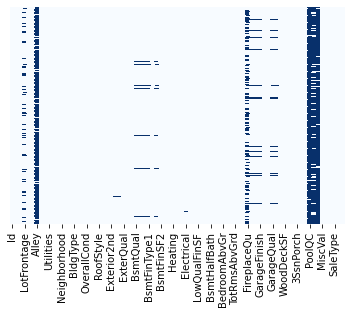

In [6]:
sns.heatmap(df_train.isna(), cmap = 'Blues',cbar=False,yticklabels=False);

In [7]:
cols_na = df_train.columns[df_train.isna().sum()!=0]

In [8]:
df_train[cols_na].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
df_train[cols_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [10]:

df_train.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1, inplace = True)

In [11]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean())

In [12]:
cols_na = df_train.columns[df_train.isna().sum()!=0]
df_train[cols_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
 7   FireplaceQu   770 non-null    object
 8   GarageType    1379 non-null   object
 9   GarageFinish  1379 non-null   object
 10  GarageQual    1379 non-null   object
 11  GarageCond    1379 non-null   object
dtypes: object(12)
memory usage: 137.0+ KB


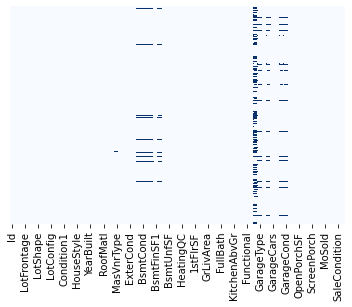

In [13]:
sns.heatmap(df_train.isna(), cmap = 'Blues',cbar=False,yticklabels=False);

In [14]:
cols_mode = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu",
              "GarageType","GarageFinish","GarageQual","GarageCond"]


In [15]:
for i in cols_mode:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])

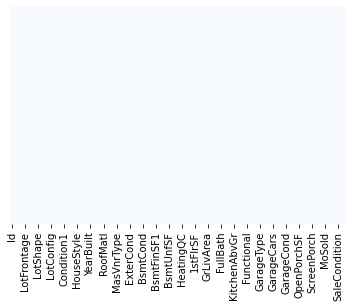

In [16]:
sns.heatmap(df_train.isna(), cmap = 'Blues',cbar=False,yticklabels=False);

In [17]:
df_train.shape

(1460, 77)

In [18]:
num_cols = [cols for cols in df_train.columns if df_train[cols].dtype in ["int64","float64"]]
cat_cols = [cols for cols in df_train.columns if df_train[cols].dtype == "object" and df_train[cols].nunique()<=20]
my_cols = num_cols + cat_cols
df_train = df_train[my_cols].copy()
print(my_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Pa

In [19]:
df_train.shape

(1460, 76)

In [20]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
for cols in cat_cols:
    df_train[cols] = label_en.fit_transform(df_train[cols])

In [22]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,2,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,4,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,4,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,4,1,1,4,4,2,8,4


In [23]:
df_train.shape

(1460, 76)

In [24]:
#####  till now we are done with the train data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
df_test.shape

(1459, 80)

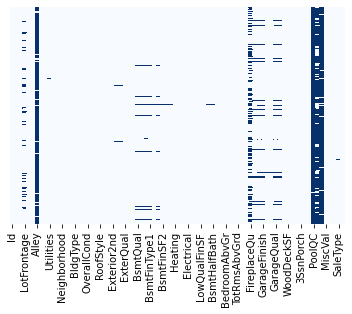

In [26]:
sns.heatmap(df_test.isna(), cbar=False, cmap='Blues', yticklabels=False);

In [27]:
cols_nul = df_test.columns[df_test.isna().sum() != 0]
df_test[cols_nul].isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [28]:
df_test[cols_nul].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    1443 non-null   object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

In [29]:
df_test.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1, inplace = True)
cols_null = df_test.columns[df_test.isna().sum() != 0]
df_test_numcols = [cols for cols in df_test[cols_null] if df_test[cols].dtype in ["int64","float64"] 
                   and df_test[cols].isna().sum() !=0]
df_test_catcols = [cols for cols in df_test[cols_null] if df_test[cols].dtype == "object" 
                   and df_test[cols].isna().sum() <=750]

In [30]:
print(df_test_catcols)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [31]:
print(df_test_numcols)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [32]:
### df_test.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1, inplace = True)
for cols in df_test_numcols:
    df_test[cols] = df_test[cols].fillna(df_test[cols].mean())
    
for cols in df_test_catcols:
    df_test[cols] = df_test[cols].fillna(df_test[cols].mode()[0])

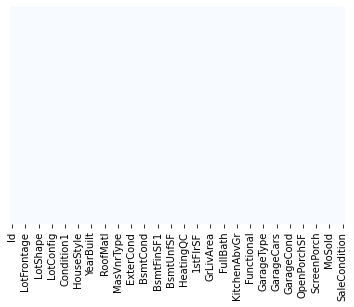

In [33]:
sns.heatmap(df_test.isna(), cbar=False, cmap='Blues', yticklabels=False);

In [34]:
df_test.shape

(1459, 76)

In [35]:
cat_cols_test = [cols for cols in df_test.columns if df_test[cols].dtype == "object"]
df_test[cat_cols_test].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        5
BldgType          5
HouseStyle        7
RoofStyle         6
RoofMatl          4
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [36]:
num_cols_test = [cols for cols in df_test.columns if df_test[cols].dtype in ["int64","float64"]]
cat_cols_test = [cols for cols in df_test.columns if df_test[cols].dtype == "object" and df_test[cols].nunique()<=20]
my_cols = num_cols_test + cat_cols_test
df_test = df_test[my_cols].copy()

In [37]:
df_test.shape

(1459, 75)

In [38]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [39]:
#####  label encoding for the test data
label_en_test = LabelEncoder()
for cols in cat_cols_test:
    df_test[cols] = label_en_test.fit_transform(df_test[cols])

In [40]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,3,6,2,1,2,3,4,2,8,4
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,2,6,2,1,2,3,4,2,8,4
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,3,6,4,1,0,3,4,2,8,4
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,2,6,2,1,0,3,4,2,8,4
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,2,6,2,1,1,3,4,2,8,4


In [41]:
df_train.drop("Id",axis =1, inplace = True)
ID = df_test["Id"]
df_test.drop("Id",axis = 1, inplace = True)


In [42]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,6,2,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,4,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,6,4,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,6,2,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2,6,4,1,1,4,4,2,8,4


In [43]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3,6,2,1,2,3,4,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,2,6,2,1,2,3,4,2,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,6,4,1,0,3,4,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,2,6,2,1,0,3,4,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,2,6,2,1,1,3,4,2,8,4


In [44]:
X_train = df_train.drop("SalePrice",axis =1)
y_train = df_train["SalePrice"]

In [45]:
from sklearn.preprocessing import StandardScaler
stanscal = StandardScaler()
X_train = stanscal.fit_transform(X_train)
df_test = stanscal.fit_transform(df_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor(n_estimators = 500, max_depth = 10, min_samples_leaf = 4,
                                    min_samples_split = 10 ,bootstrap = True, 
                                    max_features = 'auto', random_state = 10)
rand_forest.fit(X_train, y_train)
predictions = rand_forest.predict(df_test)

In [55]:
solution = pd.DataFrame({"Id": ID, "SalePrice": predictions})
solution.to_csv("house_price_solution.csv", index = False)